## Data Lake -> Data Warehouse
#### By: Mohamed Samatar, Blair Wishom, Adriel Zagala

#### Databases Cleaned 
##### nba: Blair
##### player: Muhamed
##### store: Adriel

<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
nba_df = pd.read_csv('nba_cleaned.csv')
nba_df

,display_first_last,birthdate,school,country,height,weight,season_exp,jersey,position,rosterstatus,team_name,draft_year,draft_round,draft_number,greatest_75_flag
0,Mahmoud Abdul-Rauf,1969-03-09 00:00:00,Louisiana State,USA,6-1,162.0,9.0,1,Guard,Inactive,Nuggets,1990,1,3,N
1,Tariq Abdul-Wahad,1974-11-03 00:00:00,San Jose State,France,6-6,235.0,7.0,9,Forward-Guard,Inactive,Kings,1997,1,11,N
2,Jordan Adams,1994-07-08 00:00:00,UCLA,USA,6-5,209.0,3.0,3,Guard,Inactive,Grizzlies,2014,1,22,N
3,Rafael Addison,1964-07-22 00:00:00,Syracuse,USA,6-8,241.0,6.0,7,Forward,Inactive,Nets,1986,2,39,N
4,Blake Ahearn,1984-05-27 00:00:00,Missouri State,USA,6-2,190.0,4.0,2,Guard,Inactive,Heat,Undrafted,Undrafted,Undrafted,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,Stephen Zimmerman,1996-09-09 00:00:00,UNLV,USA,7-0,240.0,2.0,33,Center,Inactive,Magic,2016,2,41,N
1782,Paul Zipser,1994-02-18 00:00:00,Bayern Munich,Germany,6-8,226.0,2.0,16,Forward,Inactive,Bulls,2016,2,48,N
1783,Ante Zizic,1997-01-04 00:00:00,,Croatia,6-10,266.0,4.0,41,Center,Inactive,Cavaliers,2016,1,23,N
1784,Bill Zopf,1948-06-07 00:00:00,Duquesne,USA,6-1,170.0,1.0,6,Guard,Inactive,Bucks,1970,2,33,N


In [3]:
nba_greatest_75 = nba_df.loc[nba_df['greatest_75_flag'].eq('Y')]
# nba_greatest_75.groupby(['team_name']).describe()
nba_greatest_75_by_team = nba_greatest_75['team_name']
# nba_greatest_75_by_team = pd.DataFrame(nba_greatest_75_by_team)
nba_greatest_75_by_team.describe()

count         36
unique        20
top       Lakers
freq           8
Name: team_name, dtype: object

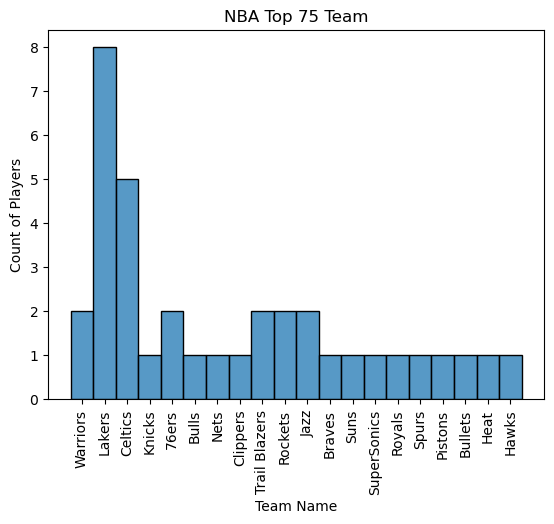

In [4]:
sns.histplot(data=nba_greatest_75_by_team)
plt.title('NBA Top 75 Team')
plt.xlabel('Team Name')
plt.ylabel('Count of Players')
plt.xticks(rotation=90)
plt.show()

In [5]:
warriors = nba_df[nba_df['team_name'].isin(['Warriors'])]
drafted_warriors = warriors.loc[warriors['draft_year'].ne('Undrafted')]
most_current_warriors = drafted_warriors.loc[drafted_warriors['draft_year'].ge('2005')]

drafted_warriors
most_current_warriors

,display_first_last,birthdate,school,country,height,weight,season_exp,jersey,position,rosterstatus,team_name,draft_year,draft_round,draft_number,greatest_75_flag
68,Nemanja Bjelica,1988-05-09 00:00:00,Fenerbahce,Serbia,6-9,234.0,8.0,8,Forward,Inactive,Warriors,2010,2,35,N
541,Charles Jenkins,1989-02-28 00:00:00,Hofstra,USA,6-3,215.0,3.0,31,Guard,Inactive,Warriors,2011,2,44,N
548,Ty Jerome,1997-07-08 00:00:00,Virginia,USA,6-5,195.0,3.0,10,Guard-Forward,Active,Warriors,2019,1,24,N
698,Jonathan Kuminga,2002-10-06 00:00:00,NBA G League Ignite,DRC,6-7,225.0,1.0,00,Forward,Active,Warriors,2021,1,7,N
779,Kevon Looney,1996-02-06 00:00:00,UCLA,USA,6-9,222.0,7.0,5,Forward,Active,Warriors,2015,1,30,N
822,Nico Mannion,2001-03-14 00:00:00,Arizona,Italy,6-2,190.0,2.0,2,Guard,Inactive,Warriors,2020,2,48,N
973,Nemanja Nedovic,1991-06-16 00:00:00,Lietuvos rytas Vilnius,Serbia,6-3,192.0,2.0,8,Guard,Inactive,Warriors,2013,1,30,N
1053,Kosta Perovic,1985-02-19 00:00:00,Partizan,Serbia,7-2,240.0,2.0,19,Center,Inactive,Warriors,2006,2,38,N
1178,Ryan Rollins,2002-07-03 00:00:00,Toledo,USA,6-3,180.0,0.0,2,Guard,Active,Warriors,2022,2,44,N
1296,Alen Smailagic,2000-08-18 00:00:00,Beko,Serbia,6-10,215.0,3.0,6,Forward,Inactive,Warriors,2019,2,39,N


In [6]:
kings = nba_df[nba_df['team_name'].isin(['Kings'])]
drafted_kings = kings.loc[kings['draft_year'].ne('Undrafted')]
most_current_kings = drafted_kings.loc[drafted_kings['draft_year'].ge('2005')]

most_current_kings

,display_first_last,birthdate,school,country,height,weight,season_exp,jersey,position,rosterstatus,team_name,draft_year,draft_round,draft_number,greatest_75_flag
271,De'Aaron Fox,1997-12-20 00:00:00,Kentucky,USA,6-3,185.0,5.0,5,Guard,Active,Kings,2017,1,5,N
362,Donte Greene,1988-02-21 00:00:00,Syracuse,USA,6-11,226.0,6.0,13,Forward,Inactive,Kings,2008,1,28,N
403,Maurice Harkless,1993-05-11 00:00:00,"St. John's, N.Y.",USA,6-7,220.0,11.0,8,Forward-Guard,Inactive,Kings,2012,1,15,N
499,Kevin Huerter,1998-08-27 00:00:00,Maryland,USA,6-7,198.0,4.0,9,Guard-Forward,Active,Kings,2018,1,19,N
531,Justin James,1997-01-24 00:00:00,Wyoming,USA,6-7,190.0,3.0,10,Guard-Forward,Inactive,Kings,2019,2,40,N
686,Kosta Koufos,1989-02-24 00:00:00,Ohio State,USA,7-0,245.0,12.0,41,Center,Inactive,Kings,2008,1,23,N
708,Skal Labissiere,1996-03-18 00:00:00,Kentucky,Haiti,6-10,235.0,5.0,7,Forward-Center,Inactive,Kings,2016,1,28,N
716,Jeremy Lamb,1992-05-30 00:00:00,Connecticut,USA,6-5,180.0,11.0,26,Guard-Forward,Inactive,Kings,2012,1,12,N
719,Carl Landry,1983-09-19 00:00:00,Purdue,USA,6-9,248.0,10.0,7,Forward,Inactive,Kings,2007,2,31,N
747,Alex Len,1993-06-16 00:00:00,Maryland,Ukraine,7-2,250.0,9.0,25,Center,Active,Kings,2013,1,5,N


In [7]:
young_warriors = most_current_warriors.loc[most_current_warriors['draft_year'].ge('2018')].count()
young_kings = most_current_kings.loc[most_current_kings['draft_year'].ge('2018')].count()

warriors_young_players = young_warriors['display_first_last']
kings_young_players = young_kings['display_first_last']

young_players = [warriors_young_players, kings_young_players]
young_players

warriors = most_current_warriors.loc[most_current_warriors['draft_year'].ge('2018')]
kings = most_current_kings.loc[most_current_kings['draft_year'].ge('2018')]

warriors_team = warriors['team_name']
kings_team = kings['team_name']
players_team = pd.concat([warriors_team, kings_team]).unique()
players_team

array(['Warriors', 'Kings'], dtype=object)

(0.0, 10.0)

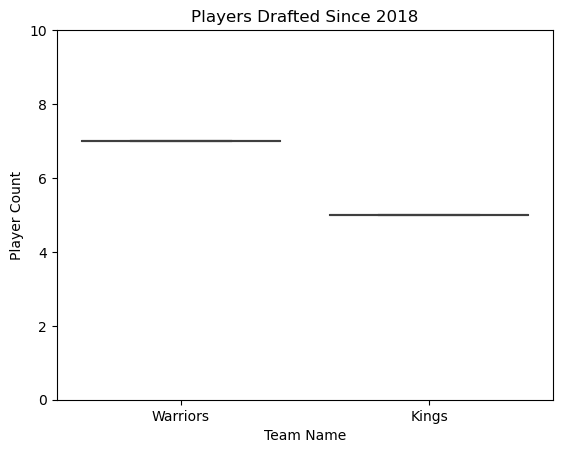

In [8]:
sns.boxplot(x=['Warriors', 'Kings'], y=young_players)
plt.title('Players Drafted Since 2018')
plt.xlabel('Team Name')
plt.ylabel('Player Count')
plt.ylim(0, 10)

In [9]:
undrafted_players = nba_df.loc[(nba_df['draft_year'].eq('Undrafted')) & (nba_df['country'].ne('USA'))].count()
drafted_players = nba_df.loc[(nba_df['draft_year'].ne('Undrafted')) & (nba_df['country'].ne('USA'))].count()
drafted_undrafted = pd.concat([undrafted_players, drafted_players])
drafted_undrafted

display_first_last     45
birthdate              45
school                 45
country                45
height                 45
weight                 45
season_exp             45
jersey                 45
position               45
rosterstatus           45
team_name              45
draft_year             45
draft_round            45
draft_number           45
greatest_75_flag       45
display_first_last    129
birthdate             129
school                129
country               129
height                129
weight                129
season_exp            129
jersey                129
position              129
rosterstatus          129
team_name             129
draft_year            129
draft_round           129
draft_number          129
greatest_75_flag      129
dtype: int64

C:\Users\bwelp\AppData\Local\Temp\ipykernel_16600\3910003285.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(drafted_undrafted['draft_year'], loc='lower right', fontsize='13', labels=['Undrafted (45 Total)', 'Drafted (129 Total)'])


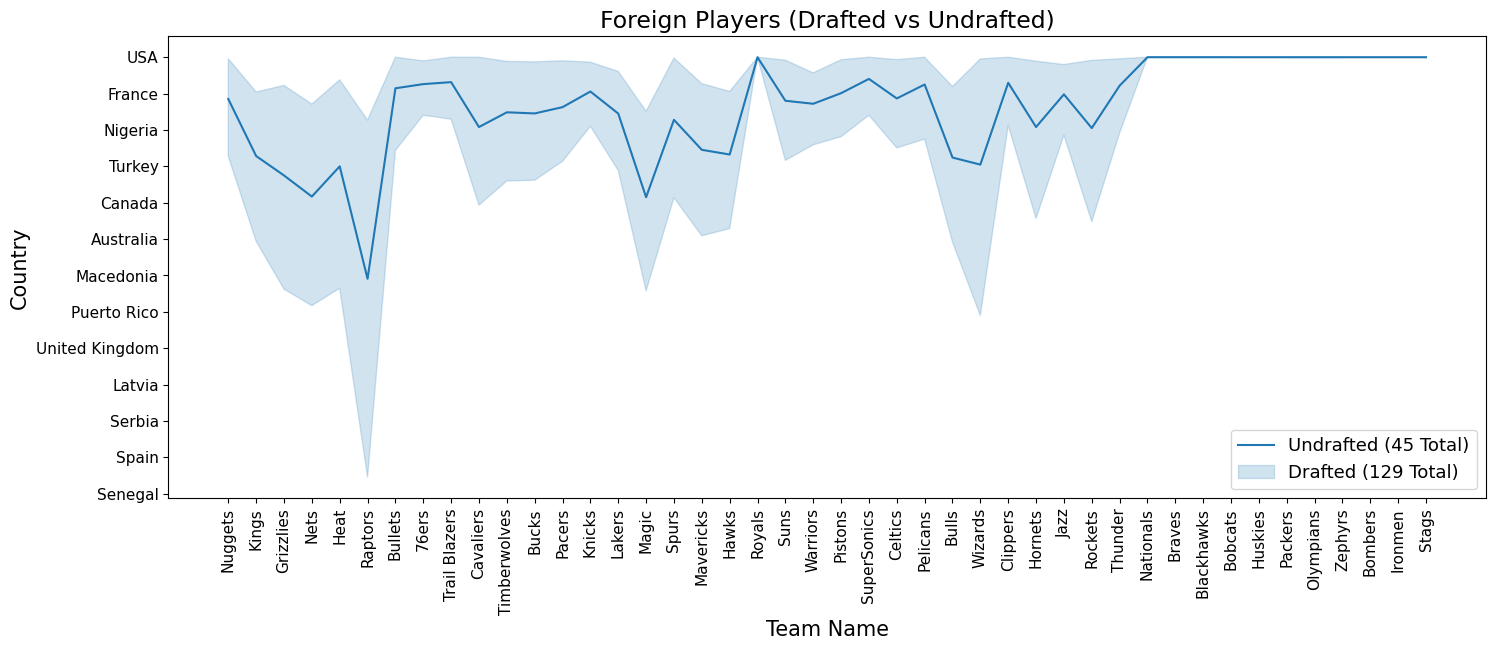

In [10]:
ax = sns.lineplot(drafted_undrafted, x=nba_df['team_name'], y=nba_df['country'])
ax.figure.set_size_inches(17, 6)
plt.title('Foreign Players (Drafted vs Undrafted)', size=17)
plt.legend(drafted_undrafted['draft_year'], loc='lower right', fontsize='13', labels=['Undrafted (45 Total)', 'Drafted (129 Total)'])
plt.xticks(rotation=90, size=11)
plt.yticks(rotation=0, size=11)
plt.xlabel('Team Name', size=15)
plt.ylabel('Country', size=15)
plt.show()

--- 

Muhamed

In [11]:
import pandas as pd, sqlite3 as s3
conn = s3.connect("archive (2)/database.sqlite")

This section will focus on the Player Table from archive 2. This table lists information on baseball players' name, DOB, country, and playstyle

In [12]:
c = conn.execute("SELECT name FROM sqlite_master WHERE type='table'").fetchall()
for l in c: print(l)

('Player',)
('Extra_Runs',)
('Batsman_Scored',)
('Batting_Style',)
('Bowling_Style',)
('Country',)
('Season',)
('City',)
('Outcome',)
('Win_By',)
('Wicket_Taken',)
('Venue',)
('Extra_Type',)
('Out_Type',)
('Toss_Decision',)
('Umpire',)
('Team',)
('Ball_by_Ball',)
('sysdiagrams',)
('sqlite_sequence',)
('Match',)
('Rolee',)
('Player_Match',)


In [13]:
player_df = pd.read_sql_query("select * from player", conn)
player_df["DOB"] = pd.to_datetime(player_df["DOB"])
player_df.set_index("Player_Id", inplace=True)

player_df.head()

,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name
Player_Id,,,,,
1,SC Ganguly,1972-07-08,1,1.0,1
2,BB McCullum,1981-09-27,2,1.0,4
3,RT Ponting,1974-12-19,2,1.0,5
4,DJ Hussey,1977-07-15,2,2.0,5
5,Mohammad Hafeez,1980-10-17,2,2.0,6


In [14]:
player_df.isna().sum()

Player_Name       0
DOB               0
Batting_hand      0
Bowling_skill    43
Country_Name      0
dtype: int64

After filling in the missing bowling skills we check for duplicates, which there are none of.

In [15]:
country_df = pd.read_sql_query("select * from country", conn).set_index("Country_Id")
print(country_df)
print()
batting_df = pd.read_sql_query("SELECT * FROM Batting_Style", conn).set_index("Batting_Id")
print(batting_df)
print()
bowling_df = pd.read_sql_query("SELECT * FROM Bowling_Style", conn).set_index("Bowling_Id")
print(bowling_df)

            Country_Name
Country_Id              
1                  India
2           South Africa
3                  U.A.E
4            New Zealand
5              Australia
6               Pakistan
7              Sri Lanka
8            West Indies
9              Zimbabwea
10               England
11            Bangladesh
12           Netherlands

              Batting_hand
Batting_Id                
1            Left-hand bat
2           Right-hand bat

                     Bowling_skill
Bowling_Id                        
1                 Right-arm medium
2               Right-arm offbreak
3            Right-arm fast-medium
4                  Legbreak googly
5            Right-arm medium-fast
6             Left-arm fast-medium
7           Slow left-arm orthodox
8           Slow left-arm chinaman
9             Left-arm medium-fast
10                        Legbreak
11                  Right-arm fast
12                Right-arm bowler
13                 Left-arm medium
14             

In [16]:
bowling_df.head(14)

,Bowling_skill
Bowling_Id,
1,Right-arm medium
2,Right-arm offbreak
3,Right-arm fast-medium
4,Legbreak googly
5,Right-arm medium-fast
6,Left-arm fast-medium
7,Slow left-arm orthodox
8,Slow left-arm chinaman
9,Left-arm medium-fast


In [17]:
player_df["Bowling_skill"] = player_df["Bowling_skill"].fillna(0).astype(int)
player_df.head(20)

,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name
Player_Id,,,,,
1,SC Ganguly,1972-07-08,1,1,1
2,BB McCullum,1981-09-27,2,1,4
3,RT Ponting,1974-12-19,2,1,5
4,DJ Hussey,1977-07-15,2,2,5
5,Mohammad Hafeez,1980-10-17,2,2,6
6,R Dravid,1973-01-11,2,2,1
7,W Jaffer,1978-02-16,2,2,1
8,V Kohli,1988-11-05,2,1,1
9,JH Kallis,1975-10-16,2,3,2


Now to combine the tables by replacing their reference ids with their corresponding values:

In [18]:
player_df["Country_Name"] = player_df["Country_Name"].replace(1, "India")\
    .replace(2, "South Africa").replace(3, "U.A.E").replace(4, "New Zealand")\
    .replace(5,"Australia").replace(6, "Pakistan").replace(7, "Sri Lanka")\
    .replace(8, "West Indies").replace(9, "Zimbabwea").replace(10, "England")\
    .replace(11, "Bangladesh").replace(12, "Netherlands")

In [19]:
player_df["Batting_hand"] = player_df["Batting_hand"].replace(1, "Left-hand bat")\
    .replace(2, "Right-hand bat")

In [20]:
player_df["Bowling_skill"] = player_df["Bowling_skill"].replace(1, "Right-arm medium")\
    .replace(2, "Right-arm offbreak").replace(3, "Right-arm fast-medium").replace(4, "Legbreak googly")\
    .replace(5,"Right-arm medium-fast").replace(6, "Left-arm fast-medium").replace(7, "Slow left-arm orthodox")\
    .replace(8, "Slow left-arm chinaman").replace(9, "Left-arm medium-fast").replace(10, "Legbreak")\
    .replace(11, "Right-arm fast").replace(12, "Right-arm bowler").replace(13, "Left-arm medium")\
    .replace(14, "Left-arm fast").replace(0, "Unspecified")

In [21]:
player_df.head(25)

,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name
Player_Id,,,,,
1,SC Ganguly,1972-07-08,Left-hand bat,Right-arm medium,India
2,BB McCullum,1981-09-27,Right-hand bat,Right-arm medium,New Zealand
3,RT Ponting,1974-12-19,Right-hand bat,Right-arm medium,Australia
4,DJ Hussey,1977-07-15,Right-hand bat,Right-arm offbreak,Australia
5,Mohammad Hafeez,1980-10-17,Right-hand bat,Right-arm offbreak,Pakistan
6,R Dravid,1973-01-11,Right-hand bat,Right-arm offbreak,India
7,W Jaffer,1978-02-16,Right-hand bat,Right-arm offbreak,India
8,V Kohli,1988-11-05,Right-hand bat,Right-arm medium,India
9,JH Kallis,1975-10-16,Right-hand bat,Right-arm fast-medium,South Africa


---

Adriel - Stores

#### Uncleaned csv file

In [22]:
dataLake = pd.read_csv('data_lake.csv')
dataLake.head(10)

C:\Users\bwelp\AppData\Local\Temp\ipykernel_16600\1328303537.py:1: DtypeWarning: Columns (3,4,6,7,8,9,10,11,15,16,17,18,21,22,24,25,27,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  dataLake = pd.read_csv('data_lake.csv')


,Unnamed: 0.1,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,...,no_of_reviews,ratings,author,cover_type,year,genre,date,product,market,size
0,0,0.0,90420332.0,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,368814.0,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2.0,9333523.0,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3.0,80155205.0,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4.0,30180504.0,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,5.0,10122647.0,INGOLF,Bar furniture,345.0,No old price,True,https://www.ikea.com/sa/en/p/ingolf-bar-stool-...,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,6.0,70404875.0,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,7.0,60155602.0,DALFRED,Bar furniture,195.0,No old price,True,https://www.ikea.com/sa/en/p/dalfred-bar-stool...,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,8.0,50406465.0,FRANKLIN,Bar furniture,129.0,No old price,True,https://www.ikea.com/sa/en/p/franklin-bar-stoo...,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,9.0,69304221.0,EKEDALEN / EKEDALEN,Bar furniture,2176.0,"SR 2,375",True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
for col in dataLake.columns:
    print(col)

Unnamed: 0.1
Unnamed: 0
item_id
name
category
price
old_price
sellable_online
link
other_colors
short_description
designer
depth
height
width
Pokemon
Card Type
Generation
Card Number
Price
ranks
title
no_of_reviews
ratings
author
cover_type
year
genre
date
product
market
size


#### Separating the IKEA records

In [24]:
ikea = dataLake[['Unnamed: 0.1','item_id','name','category','price','link','designer','depth','height','width','short_description',]]
ikea = ikea[ikea['item_id'].notna()].replace(np.nan,1).rename(columns={"Unnamed: 0.1": "record_number","name": "product_name","item_id": "item_number"}).set_index('record_number').sort_values('record_number')
ikea['item_number'] = ikea['item_number'].astype(str).apply(lambda x: x.replace('.0','')).astype(int)
ikea[['product_name','category','link','designer','short_description']] = ikea[['product_name','category','link','designer','short_description']].astype(str)
ikea[['price','depth','height','width']] = ikea[['price','depth','height','width']].astype(int)
ikea.head(5)

,item_number,product_name,category,price,link,designer,depth,height,width,short_description
record_number,,,,,,,,,,
0,90420332,FREKVENS,Bar furniture,265,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,Nicholai Wiig Hansen,1,99,51,"Bar table, in/outdoor, 51x51 cm"
1,368814,NORDVIKEN,Bar furniture,995,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,Francis Cayouette,1,105,80,"Bar table, 140x80 cm"
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095,https://www.ikea.com/sa/en/p/nordviken-nordvik...,Francis Cayouette,1,1,1,Bar table and 4 bar stools
3,80155205,STIG,Bar furniture,69,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Henrik Preutz,50,100,60,"Bar stool with backrest, 74 cm"
4,30180504,NORBERG,Bar furniture,225,https://www.ikea.com/sa/en/p/norberg-wall-moun...,Marcus Arvonen,60,43,74,"Wall-mounted drop-leaf table, ..."


In [25]:
print('Number of unique Designers: ',ikea['designer'].nunique())

Number of unique Designers:  381


In [26]:
print('Most expensive product(s): ')
high_furn = ikea[ikea['price'] == ikea['price'].max()]
high_furn

Most expensive product(s): 


,item_number,product_name,category,price,link,designer,depth,height,width,short_description
record_number,,,,,,,,,,
190,29277639,LIDHULT,Beds,9585,https://www.ikea.com/sa/en/p/lidhult-corner-so...,Henrik Preutz/IKEA of Sweden,164,102,387,"Corner sofa-bed, 6-seat"
2344,79277632,LIDHULT,Sofas & armchairs,9585,https://www.ikea.com/sa/en/p/lidhult-corner-so...,Henrik Preutz/IKEA of Sweden,164,102,387,"Corner sofa-bed, 6-seat"


In [27]:
print('Cheapest product(s): ')
low_furn = ikea[ikea['price'] == ikea['price'].min()]
low_furn

Cheapest product(s): 


,item_number,product_name,category,price,link,designer,depth,height,width,short_description
record_number,,,,,,,,,,
389,80336433,GUBBARP,Bookcases & shelving units,3,https://www.ikea.com/sa/en/p/gubbarp-knob-whit...,H Preutz/A Fredriksson,27,1,1,"Knob, 21 mm"
879,80336433,GUBBARP,Cabinets & cupboards,3,https://www.ikea.com/sa/en/p/gubbarp-knob-whit...,H Preutz/A Fredriksson,27,1,1,"Knob, 21 mm"
3349,80336433,GUBBARP,TV & media furniture,3,https://www.ikea.com/sa/en/p/gubbarp-knob-whit...,H Preutz/A Fredriksson,27,1,1,"Knob, 21 mm"


#### Separating Store records to another dataframe

In [28]:
store = dataLake[['Unnamed: 0.1','date','product','market','size']]
store = store[store['date'].notna()].rename(columns={"Unnamed: 0.1": "sale_number",}).replace(np.nan,0).set_index('sale_number')
store['date'] = pd.to_datetime(store.date)
store[['product','market','size']] = store[['product','market','size']].astype(str)
store.head(15)

,date,product,market,size
sale_number,,,,
0,2019-01-02,Aleika High Grade Flour,Bars,kg
1,2019-01-02,Aleika High Grade Flour,Bayanzurkh,kg
2,2019-01-02,Aleika High Grade Flour,Bumbugur,kg
3,2019-01-02,Aleika High Grade Flour,Emart,kg
4,2019-01-02,Aleika High Grade Flour,Kharkhorin,kg
5,2019-01-02,Aleika High Grade Flour,Khuchit Shonkhor,kg
6,2019-01-02,Aleika High Grade Flour,Max/M Mart,kg
7,2019-01-02,Aleika High Grade Flour,Mercury/Ikh Nayad,kg
8,2019-01-02,Aleika High Grade Flour,Nomin,kg


#### Separating Pokemon Card Records:

In [29]:
pokemon = dataLake[['Unnamed: 0.1','Pokemon','Card Type','Generation','Card Number','Price']]
pokemon = pokemon[pokemon['Pokemon'].notna()] \
    .rename(columns={"Unnamed: 0.1": "item_number","Pokemon": "pokemon_name","Card Type": "card_type","Card Number": "card_number","Generation": "generation","Price": "price"}).set_index('item_number')
pokemon[['pokemon_name','card_type','generation','card_number']] = pokemon[['pokemon_name','card_type','generation','card_number']].astype(str)
pokemon.head(10)

,pokemon_name,card_type,generation,card_number,price
item_number,,,,,
0,AMPHAROS,REVERSE HOLO,AQUAPOLIS,001 OF 147,2.95
1,AMPHAROS,STANDARD,AQUAPOLIS,001 OF 147,2.50
2,ARCANINE,REVERSE HOLO,AQUAPOLIS,002 OF 147,3.95
3,ARCANINE,STANDARD,AQUAPOLIS,002 OF 147,2.95
4,ARIADOS,REVERSE HOLO,AQUAPOLIS,003 OF 147,2.50
5,ARIADOS,STANDARD,AQUAPOLIS,003 OF 147,1.50
6,AZUMARILL,REVERSE HOLO,AQUAPOLIS,004 OF 147,2.95
7,AZUMARILL,STANDARD,AQUAPOLIS,004 OF 147,1.95
8,BELLOSSOM,REVERSE HOLO,AQUAPOLIS,005 OF 147,2.95


In [30]:
print("Most expensive card of each Generation")
high_gen = pokemon.groupby('generation')['price'].max()
high_gen


Most expensive card of each Generation


generation
AQUAPOLIS                   119.99
ARCEUS                       11.95
B&W - BOUNDARIES CROSSED     48.99
B&W - DARK EXPLORERS         43.99
B&W - DRAGONS EXALTED        33.99
                             ...  
XY - PHANTOM FORCES          38.99
XY - PRIMAL CLASH            13.99
XY - ROARING SKIES           17.99
XY - SHINING LEGENDS         33.99
XY - STEAM SIEGE             13.99
Name: price, Length: 217, dtype: float64

In [31]:
print("Cheapest card of each Generation")
low_gen = pokemon.groupby('generation')['price'].min()
low_gen

Cheapest card of each Generation


generation
AQUAPOLIS                   0.20
ARCEUS                      0.10
B&W - BOUNDARIES CROSSED    0.29
B&W - DARK EXPLORERS        0.09
B&W - DRAGONS EXALTED       0.19
                            ... 
XY - PHANTOM FORCES         0.09
XY - PRIMAL CLASH           0.09
XY - ROARING SKIES          0.09
XY - SHINING LEGENDS        0.09
XY - STEAM SIEGE            0.09
Name: price, Length: 217, dtype: float64

#### Separating Book Records into a separate Dataframe

In [32]:
books = dataLake[['Unnamed: 0.1','ranks','title','no_of_reviews','ratings','author','cover_type','year','genre']]
books = books[books['ranks'].notna()].rename(columns={"Unnamed: 0.1": "book_id"}).set_index('book_id')
books['ranks'] = books['ranks'].astype(str).apply(lambda x: x.replace('.0','')).astype(int)
books['year'] = books['year'].astype(str).apply(lambda x: x.replace('.0','')).astype(int)
books['no_of_reviews'] = books['no_of_reviews'].astype(str).apply(lambda x: x.replace(',','')).astype(int)
books['ratings'].astype(int)
books['genre'] = books['genre'].replace('unknown','Other')
books.tail(10)

,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
book_id,,,,,,,,
1281,91,The Step-by-Step Instant Pot Cookbook: 100 Sim...,30581,4.7,Jeffrey Eisner,Paperback,2021,Non Fiction
1282,92,The Vanishing Half: A Novel,96412,4.4,Brit Bennett,Hardcover,2021,Fiction
1283,93,A Promised Land,125017,4.9,Barack Obama,Hardcover,2021,Non Fiction
1284,94,What Should Danny Do? (The Power to Choose Ser...,22169,4.8,Adir Levy,Hardcover,2021,Fiction
1285,95,The Wish,35292,4.7,Nicholas Sparks,Hardcover,2021,Fiction
1286,96,Will,21401,4.8,Will Smith,Hardcover,2021,Non Fiction
1287,97,Think and Grow Rich: The Landmark Bestseller N...,79872,4.7,Napoleon Hill,Paperback,2021,Non Fiction
1288,98,Dragons Love Tacos,15753,4.8,Adam Rubin,Hardcover,2021,Fiction
1289,99,The Truth About COVID-19: Exposing The Great R...,7246,4.8,Doctor Joseph Mercola,Hardcover,2021,Non Fiction


In [33]:
corr_review_rate = books['no_of_reviews'].corr(books['ratings'])
print("The correlation between the number of reviews and ratings is: ",corr_review_rate)

corr_rank_rate = books['ranks'].corr(books['ratings'])
print("The correlation between the book ranking and ratings is: ",corr_rank_rate )

The correlation between the number of reviews and ratings is:  0.17327873701234023
The correlation between the book ranking and ratings is:  -0.014559168438934468


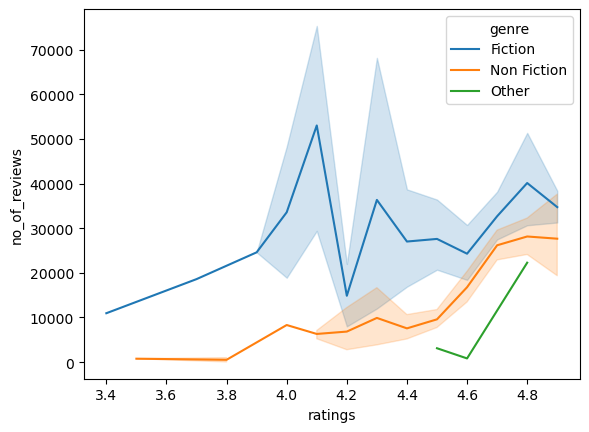

In [34]:
fig = sns.lineplot(
    data=books,
    x="ratings", y="no_of_reviews", hue="genre",
)